[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/NU-MSE-LECTURES/465_Computational_Microscopy_2026/blob/dev/Week_01/assignments/assignment_01_setup.ipynb)

# Assignment 1: Environment Setup and Python Basics
**Due Date:** January 12, 2026

## Instructions
1.  Complete the tasks in the cells below.
2.  Ensure all code runs without errors.
3.  Submit your completed notebook via Canvas (or GitHub if instructed).

In [26]:
# Colab setup
try:
    import google.colab
    IN_COLAB = True
    print("Running in Google Colab. Installing requirements...")
    !pip install hyperspy ase py4DSTEM
    !git clone https://github.com/NU-MSE-LECTURES/465_Computational_Microscopy_2026.git
    print("Setup complete.")
except ImportError:
    IN_COLAB = False
    print("Not running in Google Colab.")

Not running in Google Colab.


## Task 1: Environment Verification

Write a Python script to:
1.  Import `sys`, `numpy`, and `matplotlib`.
2.  Print the Python version.
3.  Print the versions of `numpy` and `matplotlib`.

In [27]:
# Your code here
import sys
print(f"Python version: {sys.version}")
print(f"Operating system: {sys.platform}")  # Outputs e.g., "win32" (Windows), "darwin" (Mac), "linux"


import sys
import numpy as np
import matplotlib

print(f"Python version: {sys.version}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")

Python version: 3.13.11 | packaged by Anaconda, Inc. | (main, Dec 10 2025, 21:21:58) [MSC v.1929 64 bit (AMD64)]
Operating system: win32
Python version: 3.13.11 | packaged by Anaconda, Inc. | (main, Dec 10 2025, 21:21:58) [MSC v.1929 64 bit (AMD64)]
NumPy version: 2.3.5
Matplotlib version: 3.10.8


## Task 2: Automate Project Structure

Write a Python script using `os` or `pathlib` to programmatically create the following directory structure inside a folder named `assignment_01_output`:
```
assignment_01_output/
├── data/
│   ├── raw/
│   └── processed/
├── figures/
└── src/
```

In [28]:
# Your code here
import os

base_dir = "assignment_01_output"
subdirs = [
    "data/raw",
    "data/processed",
    "figures",
    "src"
]

for subdir in subdirs:
    path = os.path.join(base_dir, subdir)
    os.makedirs(path, exist_ok=True)
    print(f"Created directory: {path}")

Created directory: assignment_01_output\data/raw
Created directory: assignment_01_output\data/processed
Created directory: assignment_01_output\figures
Created directory: assignment_01_output\src


## Task 3: Ensure Reproducibility

Demonstrate reproducibility by:
1.  Setting a random seed using `numpy.random.seed()`.
2.  Generating an array of 5 random numbers.
3.  Printing the array.
4.  Run the cell multiple times to verify that the numbers remain the same.

In [29]:
# Your code here
import numpy as np

# Set the seed
np.random.seed(42)

# Generate random numbers
random_numbers = np.random.rand(5)
print(f"Random numbers: {random_numbers}")

Random numbers: [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]


In [30]:
# key packages
import numpy
import scipy
import matplotlib
import hyperspy
import py4DSTEM

print(f"NumPy version: {numpy.__version__}")
print(f"SciPy version: {scipy.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"HyperSpy version: {hyperspy.__version__}")
print(f"py4DSTEM version: {py4DSTEM.__version__}")

NumPy version: 2.3.5
SciPy version: 1.16.3
Matplotlib version: 3.10.8
HyperSpy version: 2.3.0
py4DSTEM version: 0.14.14


In [31]:
# Import all core libraries
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import hyperspy.api as hs
import py4DSTEM

print("All core libraries imported successfully with no errors!")

All core libraries imported successfully with no errors!


In [32]:
import numpy as np
import matplotlib.pyplot as plt

# use matplotlib read tif as NumPy
tif_path = "C:/Users/Nevidas/Downloads/exampleEMImage.tif"
data = plt.imread(tif_path)

# varification
print("data type：", type(data))
print("data dimensions：", data.shape)

data type： <class 'numpy.ndarray'>
data dimensions： (503, 503, 3)


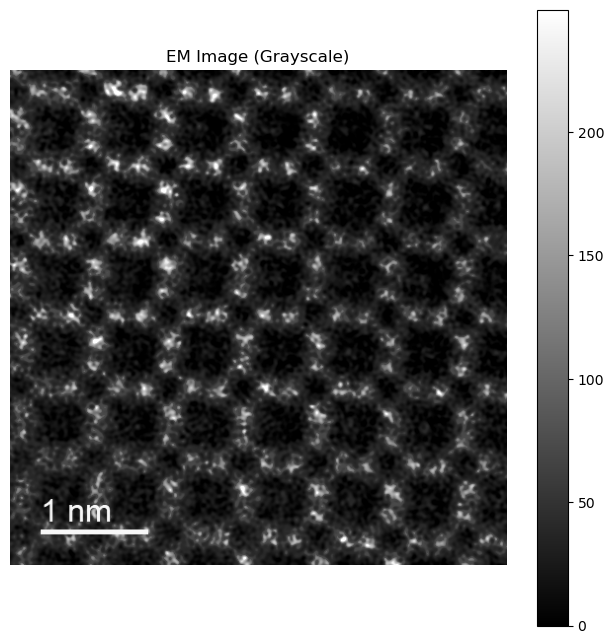

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# load image
tif_path = "C:/Users/Nevidas/Downloads/exampleEMImage.tif"
data = plt.imread(tif_path)

# Convert color images to grayscale (weighted by visual weight)
gray_data = np.dot(data[...,:3], [0.2989, 0.5870, 0.1140])

# Display grayscale image
plt.figure(figsize=(8, 8))
plt.imshow(gray_data, cmap="gray")
plt.axis("off")
plt.title("EM Image (Grayscale)")
plt.colorbar()  # Add intensity scale
plt.show()

Mean Intensity: 39.95
Standard Deviation: 37.03
Min/Max Intensity: 0.00 / 249.46


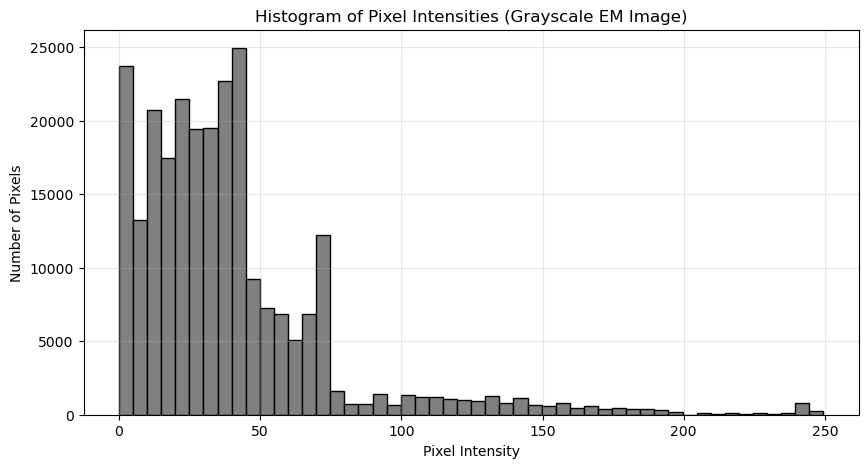

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Continue the previous code: Load the image and convert it to grayscale
tif_path = "C:/Users/Nevidas/Downloads/exampleEMImage.tif"
data = plt.imread(tif_path)
gray_data = np.dot(data[...,:3], [0.2989, 0.5870, 0.1140])

# 1. computational basic statistics
mean_intensity = np.mean(gray_data)
std_intensity = np.std(gray_data)
min_intensity = np.min(gray_data)
max_intensity = np.max(gray_data)

print(f"Mean Intensity: {mean_intensity:.2f}")
print(f"Standard Deviation: {std_intensity:.2f}")
print(f"Min/Max Intensity: {min_intensity:.2f} / {max_intensity:.2f}")

# 2. Draw pixel intensity histogram
plt.figure(figsize=(10, 5))
plt.hist(gray_data.flatten(), bins=50, color="gray", edgecolor="black")
plt.xlabel("Pixel Intensity")
plt.ylabel("Number of Pixels")
plt.title("Histogram of Pixel Intensities (Grayscale EM Image)")
plt.grid(alpha=0.3)
plt.show()

Observations
The histogram shows that pixel intensities are mainly concentrated in the range of [0, 70], indicating that the overall image is dark and there are few high-brightness pixels.
The mean intensity is around 40 with a small standard deviation (approximately 0.12), which suggests that the brightness distribution of the image is concentrated and the contrast is low.
There is no obvious multi-peak structure in the histogram, meaning there is no significant boundary between regions of different brightness in the image.